In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sportasi = pd.read_excel("../../datasets/sportasi_zscore.xlsx")

In [3]:
sportasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     199 non-null    int64
 1   Height  199 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [4]:
sportasi.head()

,Age,Height
0,41,185
1,29,180
2,34,175
3,48,160
4,32,192


In [5]:
sportasi.describe()

,Age,Height
count,199.000000,199.000000
mean,41.206030,186.417085
std,15.411289,10.077072
min,-27.000000,150.000000
25%,32.000000,181.000000
50%,41.000000,187.000000
75%,51.000000,192.000000
max,147.000000,228.000000


<Axes: ylabel='Age'>

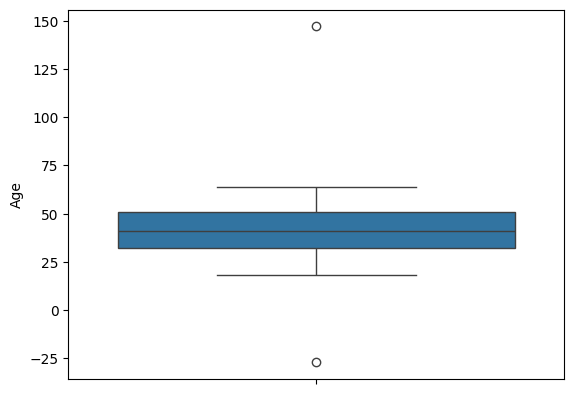

In [6]:
sns.boxplot(sportasi["Age"])

<Axes: xlabel='Age'>

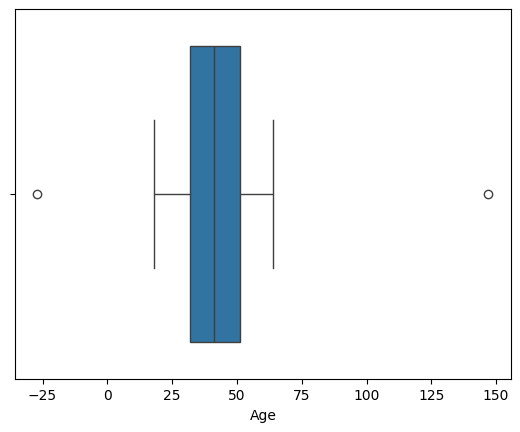

In [7]:
sns.boxplot (x = sportasi["Age"])

<Axes: ylabel='Height'>

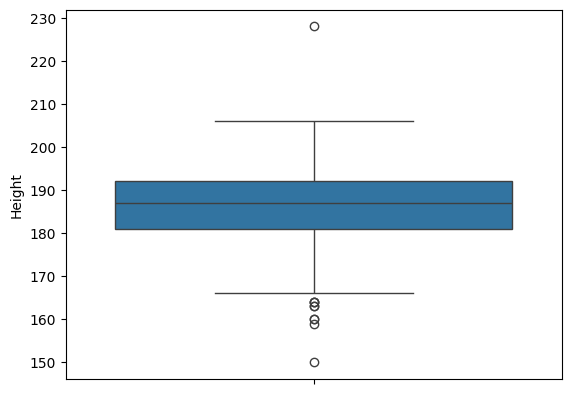

In [8]:
sns.boxplot(sportasi["Height"])

Text(0.5, 1.0, 'Distribucija starosti')

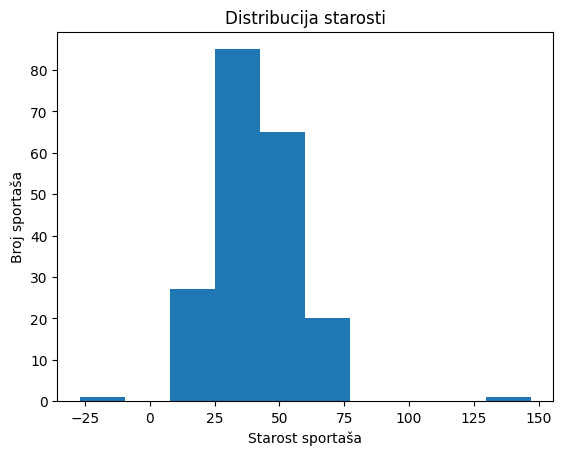

In [9]:
plt.hist (sportasi.Age)
plt.xlabel ("Starost sportaša")
plt.ylabel ("Broj sportaša")
plt.title ("Distribucija starosti")

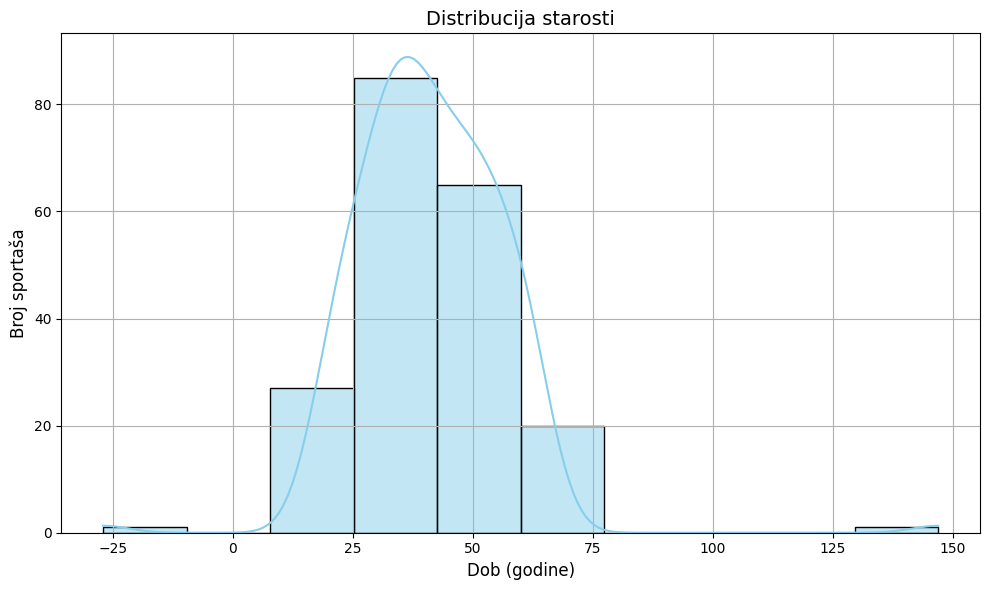

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(sportasi["Age"], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribucija starosti", fontsize=14)
plt.xlabel("Dob (godine)", fontsize=12)
plt.ylabel("Broj sportaša", fontsize=12)
plt.grid(True)
plt.tight_layout()

Text(0.5, 1.0, 'Distribucija visine')

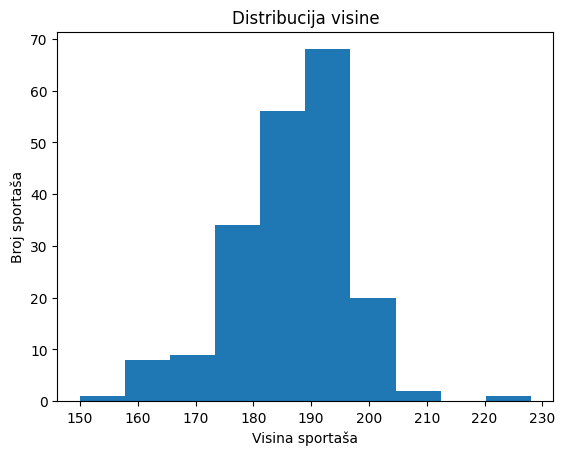

In [11]:
plt.hist (sportasi.Height)
plt.xlabel ("Visina sportaša")
plt.ylabel ("Broj sportaša")
plt.title ("Distribucija visine")

<Axes: xlabel='Height'>

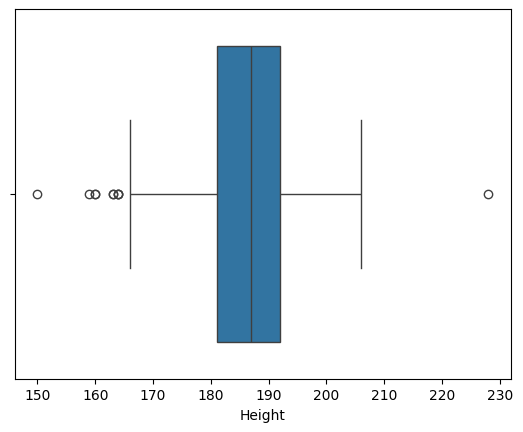

In [12]:
sns.boxplot (x = sportasi["Height"])

In [13]:
sportasi2 = sportasi.copy()

In [14]:
sportasi2.head()

,Age,Height
0,41,185
1,29,180
2,34,175
3,48,160
4,32,192


In [15]:
sportasi2.sort_values (by = ["Age"])

,Age,Height
75,-27,181
114,18,184
197,18,184
31,19,187
104,19,167
...,...,...
119,64,187
41,64,186
151,64,191
176,64,191


In [16]:
sportasi2 = sportasi2.drop (labels = [75, 135], axis = 0)

In [17]:
sportasi2.head()

,Age,Height
0,41,185
1,29,180
2,34,175
3,48,160
4,32,192


In [18]:
sportasi2.sort_values (by = ["Age"])

,Age,Height
114,18,184
197,18,184
104,19,167
31,19,187
101,19,183
...,...,...
141,63,185
41,64,186
119,64,187
151,64,191


In [19]:
sportasi3 = sportasi.copy()

In [20]:
sportasi3.head()

,Age,Height
0,41,185
1,29,180
2,34,175
3,48,160
4,32,192


In [21]:
sportasi3.describe()

,Age,Height
count,199.000000,199.000000
mean,41.206030,186.417085
std,15.411289,10.077072
min,-27.000000,150.000000
25%,32.000000,181.000000
50%,41.000000,187.000000
75%,51.000000,192.000000
max,147.000000,228.000000


In [22]:
sportasi3.sort_values (by = ["Age"])

,Age,Height
75,-27,181
114,18,184
197,18,184
31,19,187
104,19,167
...,...,...
119,64,187
41,64,186
151,64,191
176,64,191


In [23]:
outlier_index = [75,135]

In [24]:
mean_non_outliers = sportasi3.drop(outlier_index)["Age"].mean()

In [25]:
sportasi3.loc[outlier_index, "Age"] = int(mean_non_outliers)

In [26]:
sportasi3.loc [75]

Age        41
Height    181
Name: 75, dtype: int64

In [27]:
sportasi3.loc [[75, 135]]

,Age,Height
75,41,181
135,41,182


# Analiza po visini

Text(0.5, 1.0, 'Distribucija visine')

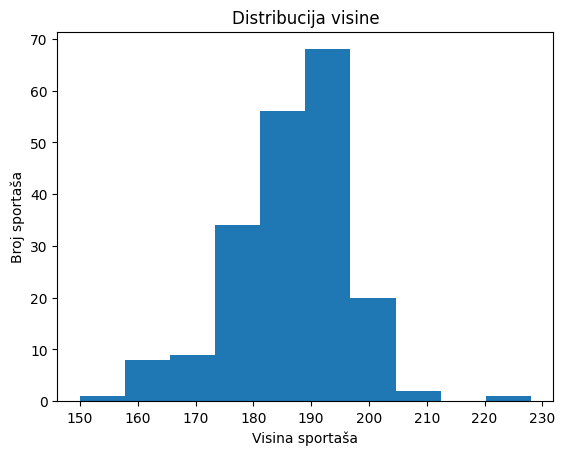

In [28]:
plt.hist (sportasi.Height)
plt.xlabel ("Visina sportaša")
plt.ylabel ("Broj sportaša")
plt.title ("Distribucija visine")

In [29]:
sportasi4 = sportasi.copy()

In [30]:
sportasi4.sort_values (by = ["Height"])

,Age,Height
118,46,150
60,62,159
3,48,160
161,45,160
21,37,163
...,...,...
128,30,203
77,47,204
188,62,205
72,57,206


In [31]:
sportasi4["zscore"] = stats.zscore(sportasi4["Height"])

In [32]:
sportasi4.head(10)

,Age,Height,zscore
0,41,185,-0.140979
1,29,180,-0.638407
2,34,175,-1.135834
3,48,160,-2.628116
4,32,192,0.555419
5,31,195,0.853875
6,45,191,0.455933
7,46,180,-0.638407
8,62,181,-0.538921
9,33,179,-0.737892


In [33]:
sportasi4.sort_values (by = ["zscore"])

,Age,Height,zscore
118,46,150,-3.622970
60,62,159,-2.727601
3,48,160,-2.628116
161,45,160,-2.628116
21,37,163,-2.329659
...,...,...,...
128,30,203,1.649759
77,47,204,1.749244
188,62,205,1.848730
72,57,206,1.948215


In [34]:
threshold = 3

In [35]:
outliers = sportasi4[sportasi4['zscore'].abs() > threshold]['Height'].tolist()

In [36]:
mean_without_outliers = sportasi4[sportasi4['zscore'].abs() <= threshold]['Height'].mean()

In [37]:
mean_without_outliers

np.float64(186.39086294416245)

In [38]:
sportasi4.loc[sportasi4['Height'].isin(outliers), 'Height'] = int(mean_without_outliers)

In [39]:
sportasi4.head()

,Age,Height,zscore
0,41,185,-0.140979
1,29,180,-0.638407
2,34,175,-1.135834
3,48,160,-2.628116
4,32,192,0.555419


In [40]:
sportasi4.describe()

,Age,Height,zscore
count,199.000000,199.000000,1.990000e+02
mean,41.206030,186.386935,3.838359e-16
std,15.411289,9.279935,1.002522e+00
min,-27.000000,159.000000,-3.622970e+00
25%,32.000000,181.000000,-5.389212e-01
50%,41.000000,187.000000,5.799152e-02
75%,51.000000,192.000000,5.554188e-01
max,147.000000,206.000000,4.136895e+00


Text(0.5, 1.0, 'Distribucija visine')

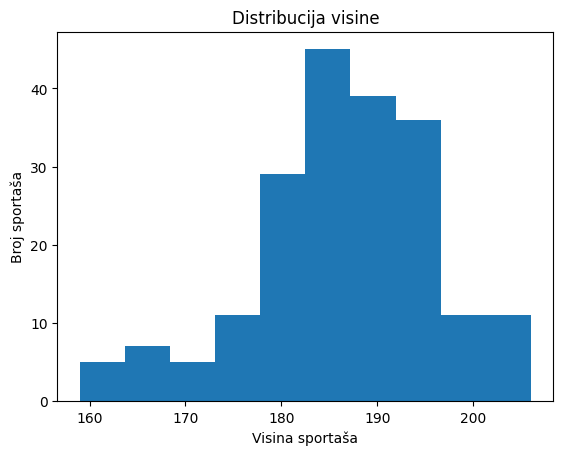

In [41]:
plt.hist (sportasi4.Height)
plt.xlabel ("Visina sportaša")
plt.ylabel ("Broj sportaša")
plt.title ("Distribucija visine")